# Delivered

Description of incremental development throughout the project.

## Cycle 1

1. Business Planning
     - Business problem
     - Input
     - Output
     - Process
     - Desk research
     
2. Feature Engineering
     - Recency
     - Frequency
     - Monetization
    
3. Clustering Validation Metrics
     - WSS (Within-Cluster Sum of Square)
     - SS (Silhouette Score)
       
4. Cluster Analysis
     - 3D plot
     - Cluster Profile
     
     

## Cycle 2

1. Feature Engineering
     - Average Ticket
    
2. Silhouette Analysis
     - Silhouette Analysis
     
3. Cluster Visualization
     - UMAP
     
4. Cluster Profile Analysis
     - Description of cluster centroids

## Cycle 3

1. Descriptive Analysis
     - Numerical attributes
     - Categorical attributes
    
2. Feature Engineering
     - Average Recency
     - Number of Returns
     
3. Data preparation
     - Standard Scaler
     
4. Cluster Analisys
    - Umap
    - New cluster profile

# Solution Planning

## Business Problem

**What is the business problem?**
1. Select the most valuable customers to join the "Loyals" loyalty program.

2. Answering business questions to the marketing team.

### Output

**What will I deliver? / Where does the business team want to see it?**

* 1) List in xls / send by email. It must contain customers who will join Loyals (loyalty program).
    - Format:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) PDF report answering business questions / send by email and present to the marketing team:
     - Who are the people eligible to participate in the Loyals program?
     - How many customers will be part of the group?
     - What are the main characteristics of these customers?
     - What is the percentage of revenue contribution from Loyals?
     - What is the expected revenue for this group for the coming months?
     - What are the conditions for a person to be eligible for Loyals?
     - What are the conditions for a person to be removed from Loyals?
     - What is the guarantee that the Loyals program is better than the rest of the base?
     - What actions can the marketing team take to increase revenue?

### Input

**Data sources:**
     Dataset "Ecommerce.csv", containing e-commerce sales for the period of one year.

**Tools:**
     Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Type of problem:**
Separation of customers by groups.
    
**Main methods:**
    clustering.

**Business Questions:**
* 1) Who are the people eligible to participate in the Loyals program?
    - What does it mean to be eligible? / What are higher "value" customers? (depending on business area)
        - Invoicing:
             - High average ticket
             - High LTV (sum of customer revenue)
             - Low recency (time since last purchase)
             - High basket size (qty products purchased per purchase)
             - Low churn probability (would use the output of a model)
             - High LTV Prediction (would use output from a model)
             - High propensity to buy (would use the output of a model)
        - Cost:
             - Low return rate
        - Shopping experience:
             - High average of the evaluations

 PS: the features will be created in feature engineering.
 
 
* 2) How many customers will be part of the group?
    - Number of customers
    - % in relation to the total number of clients
    
    
* 3) What are the main characteristics of these customers?
    - Write customer characteristics:
        - Age
        - Country
        - Wage
        - Location
     - Write key customer buying behaviors (business metrics)
        - See clustering features (question 1)
         
 For look alike: prospecting similar customers on the internet


* 4) What percentage of revenue contribution comes from Loyals?
    - Calculate the company's total revenue during the year.
    - Calculate the revenue (%) for the Loyals cluster only.
   
   
* 5) What is the expected revenue for this group for the coming months?
    - Loyals LTV calculation (with moving average, time series, arima..)
    - Time Series (ARMA, ARIMA, HoltWinter, etc.)
    - Cohort analysis (with time, location, product..)

 There must be a billing target, consult business.
    
    
* 6) What are the conditions for a person to be eligible for Loyals?
    - Set the evaluation interval (every 1 month, 3 months..)
    - The client's "performance" should be close to the Loyals cluster average.
    
    
* 7) What are the conditions for a person to be removed from Loyals?
    - Customer "performance" is no longer closer to the Loyals cluster average.
   
   
* 8) What is the guarantee that the Loyals program is better than the rest of the base?
    - A/B test
    - Hypothesis test


* 9) What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Cheaper shipping
    - Visit the company
    - Offer personal stylist
    - Recommend cross selling
    - Offer exclusive content

## Solution Benchmarking

### Desk Research

Reading articles on customer segmentation on the internet to understand what the market is doing.

Identify from market solutions, with the business team, what we can do as an MVP.

1. RFM segmentation model.

# Environment Preparation

## Imports

In [419]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
import umap.umap_        as umap
import numpy             as np
import re

from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from yellowbrick.cluster      import KElbowVisualizer, SilhouetteVisualizer
from plotly                   import express as px
from sklearn                  import preprocessing as pp
#from IPython.display         import Image

## Helper Functions

In [3]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [4]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [6]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
271891,560723,21933,PINK VINTAGE PAISLEY PICNIC BAG,2,18-Jul-17,1.65,16464.0,United Kingdom
329611,565847,82494l,WOODEN FRAME ANTIQUE WHITE,3,5-Sep-17,8.29,NaN,United Kingdom
42305,539981,22196,SMALL HEART MEASURING SPOONS,12,21-Dec-16,0.85,13304.0,United Kingdom


# Data Description

In [7]:
df1 = df_raw.copy()

## Rename Columns

In [8]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398351,571239,22689,DOORMAT MERRY CHRISTMAS RED,10,12-Oct-17,7.08,12744.0,Singapore
115954,546165,22499,WOODEN UNION JACK BUNTING,3,8-Mar-17,5.95,18183.0,United Kingdom
465063,576202,21314,SMALL GLASS HEART TRINKET POT,48,12-Nov-17,1.85,13767.0,United Kingdom


In [9]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [11]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [12]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
277654,561128,23061,VINTAGE EMBOSSED HEART,24,23-Jul-17,1.25,16249.0,United Kingdom
145334,548893,21507,"ELEPHANT, BIRTHDAY CARD,",1,2-Apr-17,0.83,NaN,United Kingdom
434393,574043,23202,JUMBO BAG VINTAGE LEAF,5,31-Oct-17,2.08,16367.0,United Kingdom


## Data Dimensions

In [22]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 406829
Number of columns: 8


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


## Check NA

In [24]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Replace NA

In [25]:
#remove rows with NA
df1 = df1.dropna( subset=['description','customer_id'] )

In [26]:
print (f'Removed data: { 1-(df1.shape[0] / df_raw.shape[0]):.2f}%')

Removed data: 0.25%


In [27]:
df1.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France
406828,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France


In [28]:
#reset index
df1 = df1.reset_index(drop=True)

In [29]:
#new num of rows
df1.shape

(406829, 8)

In [30]:
#check
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change Types

In [31]:
#correct data types ensure correct calculations using the columns on next sessions

In [32]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [33]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
311925,572658,21636,MADRAS NOTEBOOK MEDIUM,12,23-Oct-17,0.75,17690.0,United Kingdom
298564,571434,22579,WOODEN TREE CHRISTMAS SCANDINAVIAN,15,15-Oct-17,0.29,13069.0,United Kingdom
160439,556503,16161U,WRAP SUKI AND FRIENDS,25,11-Jun-17,0.42,13517.0,United Kingdom


In [34]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [35]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [36]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [37]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [38]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
5128,537036,85135C,RED DRAGONFLY HELICOPTER,1,2016-12-01,7.95,15545,United Kingdom
254792,567429,22398,MAGNETS PACK OF 4 SWALLOWS,12,2017-09-18,0.39,17686,United Kingdom
346713,575902,20975,12 PENCILS SMALL TUBE RED RETROSPOT,24,2017-11-09,0.65,15544,United Kingdom


In [39]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [42]:
#here we identify state of variables, but take action just on proper sections ahead.
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [44]:
num_attributes.head()

,quantity,unit_price,customer_id
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850


In [48]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


#### quantity

In [ ]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]

#### unit_price

In [ ]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]

### Cathegorical Attributes

In [49]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### invoice_no

In [158]:
cat_attributes.dtypes

invoice_no     object
stock_code     object
description    object
country        object
dtype: object

In [140]:
# problem: we have invoice_no with letters and numbers
#cat_attributes['invoice_no'].astype( int )  # -> error: ex.'C536379'

In [149]:
# identify number of sales with characters on invoice_no: 
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397,United Kingdom
406461,C581499,M,Manual,-1,2017-12-07,224.69,15498,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315,United Kingdom


In [156]:
#looks like all invoice_no with C, has negative quantity. Lets check:
print( f'Total number of invoices: {len( df_letter_invoices )}')
print( f'Total number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0 ] )}')

Total number of invoices: 8905
Total number of negative quantity: 8905


In [ ]:
#1. since quantity variable will separate into 2 purchase and return datasets, the invoice_no with letters will automatically separated at the return dataset. 
    #ACTION: No action.

#### stock_code

In [65]:
df1['stock_code']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
406824     22613
406825     22899
406826     23254
406827     23255
406828     22138
Name: stock_code, Length: 406829, dtype: object

In [160]:
# get stock_codes with only letters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [162]:
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ) ].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
279996,569686,POST,POSTAGE,2,2017-10-03,18.00,12719,France
118454,551270,M,Manual,1,2017-04-25,2.55,15891,United Kingdom
69502,545235,POST,POSTAGE,2,2017-02-27,18.00,12683,France
309661,572344,M,Manual,48,2017-10-22,1.50,14607,United Kingdom
153716,555648,M,Manual,12,2017-06-04,0.39,14623,United Kingdom
392111,580265,POST,POSTAGE,1,2017-11-30,40.00,12587,Finland
291777,570798,POST,POSTAGE,2,2017-10-10,18.00,12679,France
248821,566773,POST,POSTAGE,2,2017-09-13,40.00,12444,Norway
119196,551346,POST,POSTAGE,3,2017-04-26,15.00,12362,Belgium
366365,577606,POST,POSTAGE,3,2017-11-19,28.00,12462,Spain


In [161]:
#check stock_code with letters only 
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].count()

1774

In [ ]:
#2. stock_code has values useless values: ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']
    #ACTION: remove them [variable filtering]

#### description

In [163]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [ ]:
#3. description is an useless feature so far
    #ACTION: Delete them [variable filtering] 

#### country

In [164]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [169]:
len(df1['country'].unique())

37

In [166]:
df1['country'].value_counts(normalize=True)

United Kingdom    0.889509
Germany           0.023339
France            0.020871
EIRE              0.018398
Spain             0.006226
                    ...   
Lithuania         0.000086
Brazil            0.000079
Czech Republic    0.000074
Bahrain           0.000042
Saudi Arabia      0.000025
Name: country, Length: 37, dtype: float64

In [226]:
#unique users per country
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head(30)

,country,customer_id
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [177]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
    #ACTION 2: # let's also replace the country name by its lat and lon (center of country) [feature engeneering]

# Variable Filtering

In [81]:
#In our scenario, it's needed to do the Variable Filtering BEFORE the Feature Engeneering.
  #Thats because on F.E, we change our granularity, and keep the variable filter after this won't make sense!

In [233]:
# In this section, let's execute actions identified on Descriptive Statistical

#Numerical Attributes
#1. quantity has negative numbers
    #ACTION: separate our dataset into sales and devolutions [variable filtering] 
        #-> LAST TO DO!
    
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    
#Cathegorical Attributes
#2. stock_code has values useless values: ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 

#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]

In [240]:
df2 = df1.copy()

## Cathegorical Attributes

### [2] stock_code

In [241]:
#2. stock_code has values useless values: ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#identify them
df2.loc[df2['stock_code'].isin(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']) ] #1761 rows

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1122,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
1698,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom
...,...,...,...,...,...,...,...,...
406413,581494,POST,POSTAGE,2,2017-12-07,18.00,12518,Germany
406461,C581499,M,Manual,-1,2017-12-07,224.69,15498,United Kingdom
406650,581570,POST,POSTAGE,1,2017-12-07,18.00,12662,Germany
406687,581574,POST,POSTAGE,2,2017-12-07,18.00,12526,Germany


In [242]:
#keem just not in list
df2 = df2.loc[~df2['stock_code'].isin(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']) ] #405020 rows

### [3] description

In [243]:
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 
df2 = df2.drop('description', axis=1)

### [4] country

In [244]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
df2[df2['country'].isin( ['European Community', 'Unspecified' ] ) ] #302 rows

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
105769,549687,20685,2,2017-04-09,7.95,12363,Unspecified
105770,549687,22691,2,2017-04-09,7.95,12363,Unspecified
105771,549687,48116,2,2017-04-09,7.95,12363,Unspecified
105772,549687,21213,24,2017-04-09,0.55,12363,Unspecified
105773,549687,21977,24,2017-04-09,0.55,12363,Unspecified
...,...,...,...,...,...,...,...
223981,564051,23007,1,2017-08-20,16.95,14265,Unspecified
223982,564051,21833,12,2017-08-20,1.69,14265,Unspecified
223983,564051,23081,2,2017-08-20,8.25,14265,Unspecified
223984,564051,23046,2,2017-08-20,6.65,14265,Unspecified


In [245]:
#remove them:
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

## Numerical Attributes

### [2] unit_price

In [246]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    #(starting with item #2, since we are removing lines here, and will separate dataset next)
    
#check products with unit_price = 0
df2.loc[df2['unit_price'] == 0 ].drop_duplicates()

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
7012,537197,22841,1,2016-12-03,0.0,12647,Germany
23071,539263,22580,4,2016-12-14,0.0,16560,United Kingdom
26046,539722,22423,10,2016-12-19,0.0,14911,EIRE
29881,540372,22090,24,2017-01-04,0.0,13081,United Kingdom
29883,540372,22553,24,2017-01-04,0.0,13081,United Kingdom
...,...,...,...,...,...,...,...
342114,575579,22437,20,2017-11-08,0.0,13081,United Kingdom
342115,575579,22089,24,2017-11-08,0.0,13081,United Kingdom
360854,577129,22464,4,2017-11-15,0.0,15602,United Kingdom
362308,577314,23407,2,2017-11-16,0.0,12444,Norway


In [247]:
#check > 0 asc
df2.loc[df2['unit_price'] > 0 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
265506,568375,BANK CHARGES,1,2017-09-24,0.001,13405,United Kingdom
3102,C536757,84347,-9360,2016-11-30,0.030,15838,United Kingdom
251195,567102,16045,500,2017-09-14,0.040,14124,United Kingdom
222602,563917,16045,100,2017-08-19,0.040,14572,United Kingdom
297710,571312,16045,100,2017-10-15,0.040,12474,Germany
359801,577057,16045,100,2017-11-15,0.040,12748,United Kingdom
297650,571308,16045,100,2017-10-15,0.040,12475,Germany
396025,580619,16045,100,2017-12-03,0.040,15053,United Kingdom
218438,563503,16045,200,2017-08-15,0.040,16488,United Kingdom
299572,571496,16045,100,2017-10-15,0.040,13265,United Kingdom


In [248]:
#let's define as threshold products >= 0.04 cents
df2.loc[df2['unit_price'] >= 0.04 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,country
321366,573405,16045,100,2017-10-28,0.04,13822,United Kingdom
303945,571937,16045,100,2017-10-18,0.04,14911,EIRE
192597,560504,16045,100,2017-07-17,0.04,13081,United Kingdom
297650,571308,16045,100,2017-10-15,0.04,12475,Germany
353496,576513,16045,100,2017-11-13,0.04,14715,United Kingdom
188809,560106,16045,100,2017-07-12,0.04,17554,United Kingdom
349665,576076,16045,100,2017-11-11,0.04,14382,United Kingdom
258948,567866,16045,100,2017-09-20,0.04,16669,United Kingdom
203377,561870,16045,100,2017-07-29,0.04,14911,EIRE
280338,569714,16045,100,2017-10-03,0.04,18033,United Kingdom


In [249]:
df2 = df2.loc[df2['unit_price'] >= 0.04 ]

### [1] quantity

In [250]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]
    
df2_returns = df2.loc[df2['quantity'] < 0]
df2_purchases = df2.loc[df2['quantity'] > 0] #there is no quantity == 0.
#done, we will use these to create features soon.

# Feature Engeneering

## Feature Creation

In [254]:
#save dataset
df2.to_csv("../data/interim/cycle3/df2_data_description_done.csv")
df2_returns.to_csv("../data/interim/cycle3/df2_returns_raw.csv")
df2_purchases.to_csv("../data/interim/cycle3/df2_purchases_raw.csv")

In [347]:
df3 = df2.copy()
df3_returns = df2_returns.copy()
df3_purchases = df2_purchases.copy()

In [348]:
# our current granularity is: stock_code + invoice_date,
# we need to have customer as granularity, to have is's features on a new table.
# let's start adjusting the dataset to build an RFM Segmentation Model (Recency, Frequency, Monetary Value)

In [349]:
#create the referente table with uniques customer_id (and reset index) 
    #description removed on this cycle
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

In [350]:
#now, since we have df3_returns and df3_purchases, let's define wich features will consider just df3_purchases and with will consider also df3_returns

### Based on Purchases

In [351]:
# Gross Revenue: (quantity * price of each purchase)
    #here, we just want to consider gross revenue from sales, not discounting returns, so lets use df3_purchases
df3_purchases['gross_revenue'] = df3_purchases['quantity'] * df3_purchases['unit_price']
df_monetary = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

In [352]:
df_ref.sample(3) #4357 rows

,customer_id,gross_revenue
574,13102,6424.09
1479,12576,1315.83
2047,15132,977.93


In [353]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
dtype: int64

In [354]:
df_ref.loc[df_ref['gross_revenue'].isna() ].head()
#we left joined gross_revenue of customers from df3_purchases with df_ref (from df3, who has all customers, (df3_returns + df3_purchases))
#so, there are 27 customer who don't have purchases, just returns, thats why they are NA for gross_revenue here

,customer_id,gross_revenue
152,17547,NaN
177,13958,NaN
180,16995,NaN
206,14213,NaN
209,14679,NaN


In [355]:
# Recency: number of days since last purchase
    #here, we want to know the last day this customer bought. If he returned, we don't want to count that day as last purchase, so let's consider just df3_purchases
df_recency = df3_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

In [356]:
df_ref.sample(3) 
#4357 rows

,customer_id,gross_revenue,recency_days
2211,15289,939.78,29.0
2157,16788,595.83,123.0
484,15529,3992.68,22.0


In [357]:
#check NAs
df_ref.isna().sum()
#there are 27 customers who never bought anything, just returned

customer_id       0
gross_revenue    27
recency_days     27
dtype: int64

In [358]:
# Frequency (number of purchases)
    #we also want to consider just number of purchases, not considering number of returns
df_freq = df3_purchases[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left')

In [359]:
df_ref.isna().sum()
#4357 rows, same 27 people just returned

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
dtype: int64

In [360]:
#average_ticket (average gross_revenue customers spend on all purchases)
df_avg_ticket = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

In [362]:
df_ref.sample(3) #4357 rows 

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
3051,16989,1133.25,7.0,6.0,94.43750
3564,13536,3448.29,1.0,7.0,19.26419
2890,16257,46.95,176.0,1.0,23.47500


In [363]:
df_ref.isna().sum()
#Same 27 NAs

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [369]:
#27/4357 = 0.6% of data
#lets drop these guys
df_ref = df_ref.dropna()
df_ref.head() #4330 rows

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


# EDA

In [377]:
df_ref.to_csv("../data/interim/cycle3/df_ref_feature_engineering_done.csv")
df4 = df_ref.copy()

In [380]:
df4.head() 
#4330 rows

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


# Data Preparation

In [450]:
#pass by now
df5 = df4.copy()

In [ ]:
# cycle 3: since we had worst results with StandardScaler than without it, let's finish this cycle without it!

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


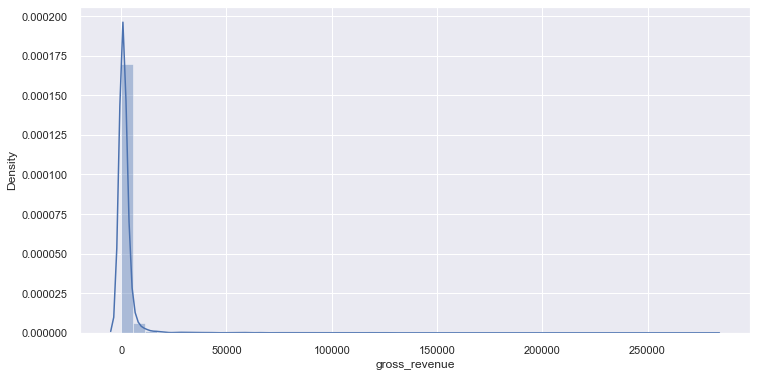

In [415]:
#data is too concentrated
#sns.distplot(df5['gross_revenue']);

In [417]:
#before tranforming
df5

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000
...,...,...,...,...,...
4352,13436,196.89,1.0,1.0,16.407500
4353,15520,343.50,1.0,1.0,19.083333
4354,13298,360.00,1.0,1.0,180.000000
4355,14569,227.39,1.0,1.0,18.949167


In [420]:
#Standard Scaler, normalizing variables
# ss = pp.StandardScaler()

# df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
# df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
# df5['invoice_no'] = ss.fit_transform(df5[['invoice_no']])
# df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])

In [421]:
#transformedb
#df5

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,0.377179,2.791504,3.889207,-0.033935
1,13047,0.135378,-0.360996,0.620902,-0.033423
2,12583,0.524388,-0.899714,1.405296,-0.026618
3,13748,-0.120506,0.028079,0.097974,-0.023240
4,15100,-0.128600,2.402430,-0.163491,0.152447
...,...,...,...,...,...
4352,13436,-0.204671,-0.909690,-0.424955,-0.035122
4353,15520,-0.188249,-0.909690,-0.424955,-0.033301
4354,13298,-0.186400,-0.909690,-0.424955,0.076219
4355,14569,-0.201255,-0.909690,-0.424955,-0.033393


/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


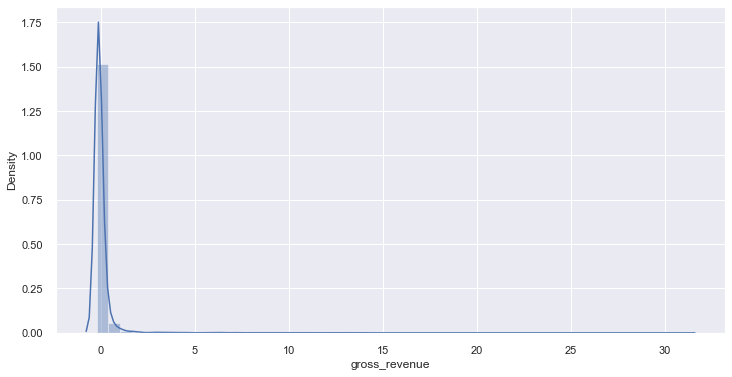

In [426]:
#distribution kept, but new scale now
sns.distplot(df5['gross_revenue']);

# Feature Selection

In [451]:
#pass by now
df6 = df5.copy()

# Hyperparameter Fine-Tuning

In [452]:
#drop customer_id
X = df6.drop('customer_id', axis=1).copy()
X.head()
#agora, temos 4 variáveis:

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use k-means with 2 metrics: 

1 - Within-Cluster Sum of Square (WSS) - calculates Compactness 

2 - Silhouette Score (SS) - calculates Compactness and Separation

 


## Within-Cluster Sum of Square (WSS)

In [453]:
#up to 7 possible clusters now
clusters = [2, 3, 4, 5, 6, 7]

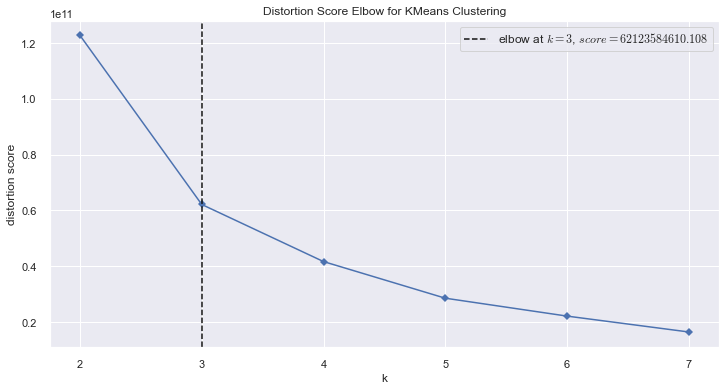

In [454]:
#let's use yellowbrick library, that inherits some functions from sklearn, and makes it easier to use performance metrics like WSS and SS
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False )
kmeans.fit(X)
kmeans.show();
#it will sugest the number of clusters (dotted lines)

In [455]:
#The smaller the WSS, the smaller the sum of the distances within the clusters, which means that the points are closer to their centroid, so the cluster is more compact!

#even though with more cluster (5, 6, 7), we would have (a bit) more condensed clusters, the optimized number of clusters according to WSS is now 4.

## Silhouette Score

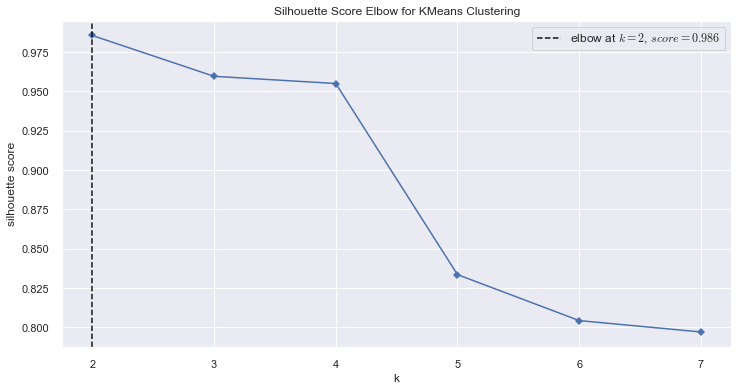

In [456]:
#calculate silhouette score also with yellowbrick library
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit(X)
kmeans.show();

In [457]:
#being SS=1 the best clustering result:
    # with 2 clusters, the result is 0.99 (awesome)
    # with 3 clusters, it is 0,96 (awesome)
    # with 4, or 5, we still have SS > 0.8, it's still very good!

#according to SS, the sugested cluster number is now 4, and it's SS IS over 0.95, what is great! 
#even 5 > 0.85, is still very good! Let's keep going with 5 by now. 

# Silhouette Analysis

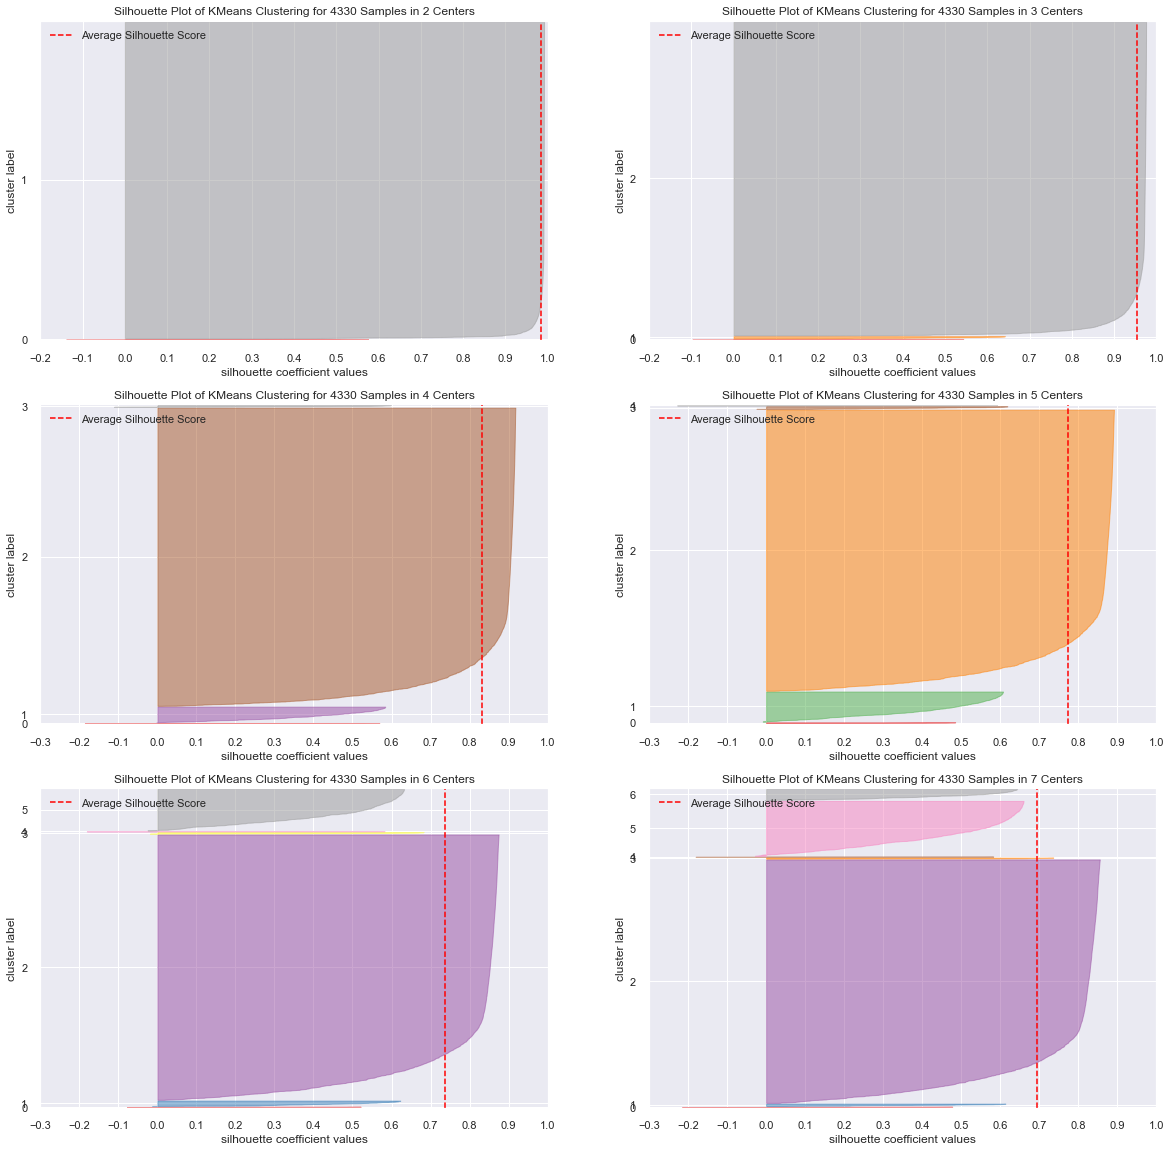

In [458]:
fig, ax = plt.subplots(3, 2, figsize=(20,20))
for k in clusters:
    #run kmeans
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    #build positions to plot
    q, mod = divmod(k, 2)
    #plot silhouette
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=ax[q-1][mod])
    #plot silhouette analysis
    visualizer.fit(X)
    visualizer.finalize() #centers = clusters

In [459]:
#with our features, our data is still too grouped, and it's generating a cluster too big! It's absorving other minors.
#so, we it can be improved on next cycle. 
#for this third cycle, let's keep on with k=5.

# Model Training

## K-Means

In [460]:
# Let's then continue with the projectand train the k-means model with 4 clusters.

#model definition
k = 5
kmeans = c.KMeans( init='random', #init centroids ramdomly
                  n_clusters=k, #3
                  n_init=10, #Num of times k-means will be run with different centroid seeds.
                  max_iter=300, #up to 300 times
                 random_state=42) #seed, to generate the same random init
#model training
kmeans.fit(X)

#get cluster of each row
labels = kmeans.labels_

## Cluster Validation

In [461]:
#Metric: WSS (Within-cluster sum of square)

#this method of k-means (sklearn) returns the WSS
print(f'WSS Value: {kmeans.inertia_}')

WSS Value: 37802566787.37714


In [462]:
#Metric: SS (Silhouette Score)

#this method of k-means (sklearn) returns the SS
print(f'SS Value: {m.silhouette_score(X, labels, metric="euclidean")}')

SS Value: 0.7732515336579786


In [464]:
#the result for 5 clusters of SS=0.77 is in theory great!
#but, as can be seen on Silhouette Analysis, with 5 cluster, we still have 1 that represents almost all data! 
#So, thats obvious it will perform well, because is't almost all the data of the dataset.

# Cluster Analysis

In [465]:
df9 = df6.copy()
#create a cluster column with labels of it's cluster from k-means, to be able to plot colored clusters
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


## Visualization Inspection

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


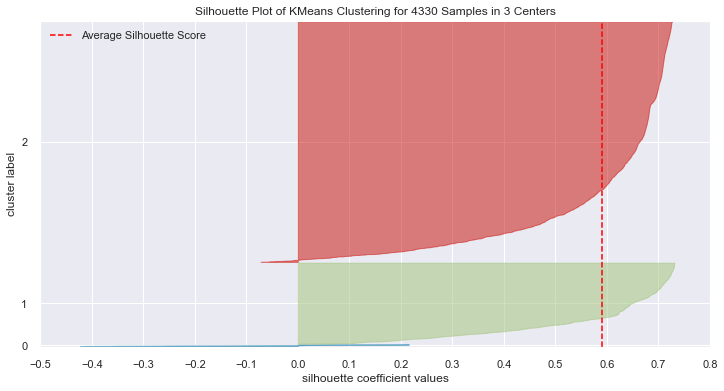

In [440]:
#there is no way to plot more than 3D charts, so let's use the Silhouette Plot
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 2d Plot

In [466]:
#chech wich features are messing up with the clustering, but it's not good do take a decision just looking at the plot, because two "bad" features combined, can turn into a "good" feature
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


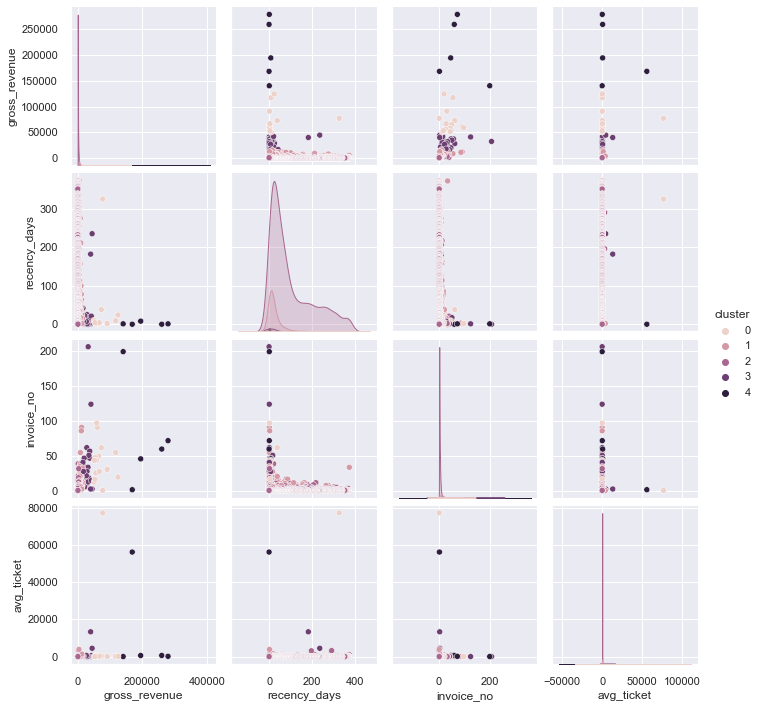

In [467]:
#plot pairplot to try to see patterns
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## UMAP

In [468]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

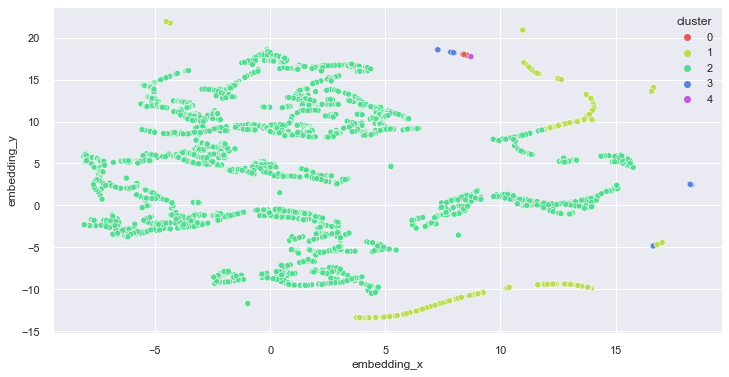

In [469]:
#n_neighbors=5

#reducer: high dimensionality projection
reducer = umap.UMAP( n_neighbors=5, #bigger: global structures, smaller: local structures (like a zoom!)
                    random_state=42 )
#fit variables in high dimensionality (x), projecting them in low dimensionality, generating the enbedding space
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0] #component 1
df_viz['embedding_y'] = embedding[:, 1] #component 2

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', #cluster color
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),# formula to get the number of clusters automatically)
                 data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

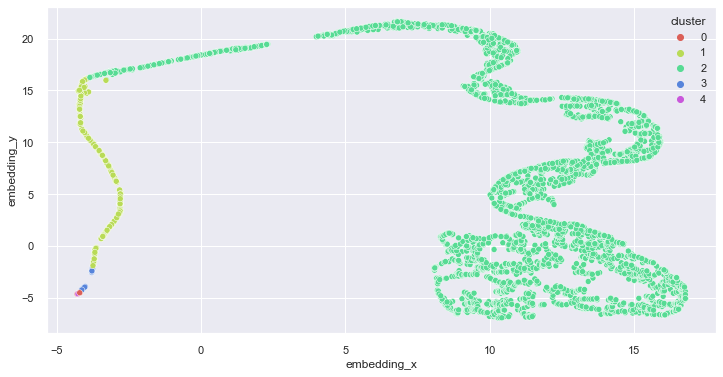

In [470]:
#n_neighbors=15
reducer = umap.UMAP( n_neighbors=15, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

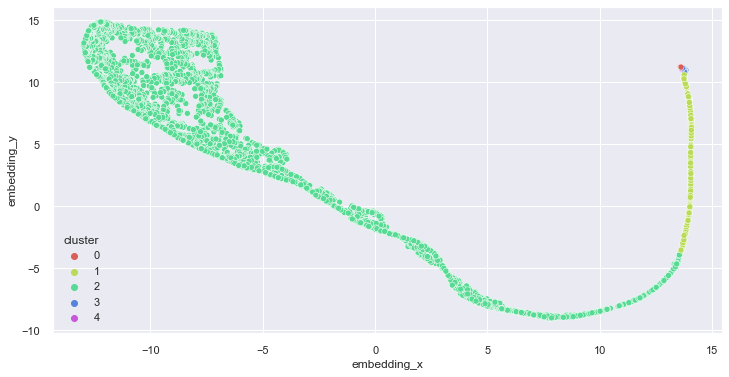

In [471]:
#n_neighbors=80
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

In [472]:
#Clustering is good better at umap in third cycle, but we still have more than 90% of being one big cluster, so let's work on data on next cycles to improve this.

## t-SNE

In [473]:
#next cycles
pass

## Cluster Profile

In [474]:
#using 4 metrics, with avg_ticket to represent the centroid of the group (mean), let's understand who are the people inside each cluster

In [475]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


In [476]:
#building df_cluster

# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100
# Agg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')
# Avg recency days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')
# Avg invoice number
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')
# Avg ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='cluster')
# cluster profiles
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,15,0.346420,70563.601333,29.333333,41.800000,5319.257814
1,1,413,9.538106,5932.363584,26.193705,12.377724,60.568214
2,2,3859,89.122402,843.890329,100.341798,2.847370,28.490561
3,3,38,0.877598,25177.080000,17.789474,34.184211,585.440059
4,4,5,0.115473,208453.866000,2.000000,75.800000,11499.503365


In [477]:
#generate the repport dinamically:
for i in range(len(df_cluster['customer_id'])):
    print(f""" Cluster {df_cluster['cluster'][i]}:
    -Number of customers: {df_cluster['customer_id'][i]} ({round(df_cluster['perc_customer'][i],1)}%)
    -Average revenue: ${round(df_cluster['gross_revenue'][i])}
    -Average recency: by each {round(df_cluster['recency_days'][i])} days ({round(df_cluster['recency_days'][i]/7)} week(s))
    -Average purchases: {round(df_cluster['invoice_no'][i])}  
    -Average ticket: ${round(df_cluster['avg_ticket'][i])} \n """)

 Cluster 0:
    -Number of customers: 15 (0.3%)
    -Average revenue: $70564
    -Average recency: by each 29 days (4 week(s))
    -Average purchases: 42  
    -Average ticket: $5319 
 
 Cluster 1:
    -Number of customers: 413 (9.5%)
    -Average revenue: $5932
    -Average recency: by each 26 days (4 week(s))
    -Average purchases: 12  
    -Average ticket: $61 
 
 Cluster 2:
    -Number of customers: 3859 (89.1%)
    -Average revenue: $844
    -Average recency: by each 100 days (14 week(s))
    -Average purchases: 3  
    -Average ticket: $28 
 
 Cluster 3:
    -Number of customers: 38 (0.9%)
    -Average revenue: $25177
    -Average recency: by each 18 days (3 week(s))
    -Average purchases: 34  
    -Average ticket: $585 
 
 Cluster 4:
    -Number of customers: 5 (0.1%)
    -Average revenue: $208454
    -Average recency: by each 2 days (0 week(s))
    -Average purchases: 76  
    -Average ticket: $11500 
 


In [478]:
#there is more than 89% of customers in one cluster (2), so we need to keep work on data to improve this on next cycle.

# Deploy

In [145]:
#in the future